# Weekly Sales Transactions
## Weekly purchase quantities of over 800 products over 52 weeks
- Context : Contains weekly purchased quantities of 800 over products over 52 weeks. These data were used in the paper "Time series clustering: A superior alternative for market basket analysis" by Tan, Swee Chuan and San Lau, Jess Pei.

- Content : Each row represents a different product

- Each column represents a week of the year (52 total weeks). The last half of the columns are normalized for you.

- Values represent quantity of the products sold during the week 52 weeks: W0, W1, …, W51
- Normalised vlaues of weekly data: Normalised 0, Normalised 1, …, Normalised 51

https://www.kaggle.com/crawford/weekly-sales-transactions

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
sales=pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')
sales.describe().T
sales.head()

,count,mean,std,min,25%,50%,75%,max
W0,811.0,8.902589,12.067163,0.0,0.000,3.00,12.00,54.0
W1,811.0,9.129470,12.564766,0.0,0.000,3.00,12.00,53.0
W2,811.0,9.389642,13.045073,0.0,0.000,3.00,12.00,56.0
W3,811.0,9.717633,13.553294,0.0,0.000,4.00,13.00,59.0
W4,811.0,9.574599,13.095765,0.0,0.000,4.00,13.00,61.0
...,...,...,...,...,...,...,...,...
Normalized 47,811.0,0.314636,0.266029,0.0,0.000,0.31,0.50,1.0
Normalized 48,811.0,0.338150,0.275690,0.0,0.105,0.33,0.50,1.0
Normalized 49,811.0,0.358903,0.286665,0.0,0.100,0.33,0.55,1.0
Normalized 50,811.0,0.373009,0.295197,0.0,0.110,0.35,0.56,1.0


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


## Normalized?

In [3]:
sales.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [4]:
data = sales.loc[:, 'W0':'W51']
data

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


<AxesSubplot:>

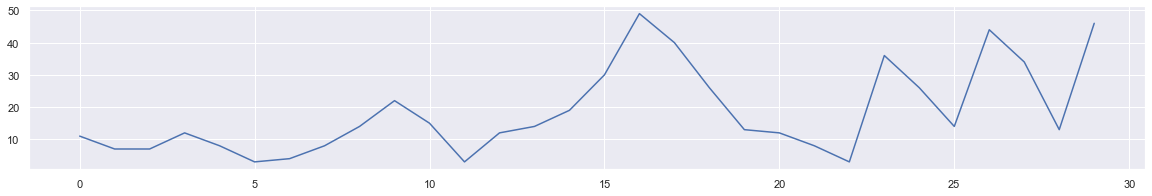

<AxesSubplot:>

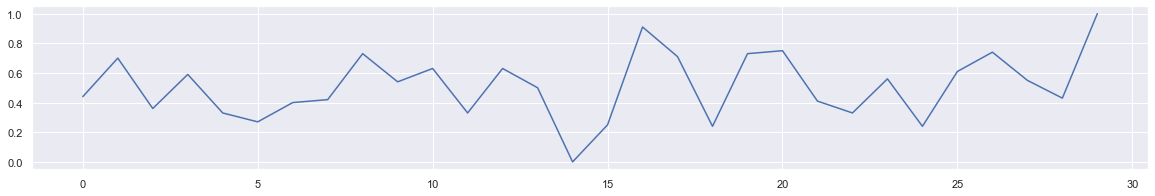

In [5]:
sales['W0'][0:30].plot(figsize=(20,3));plt.show()
sales['Normalized 0'][0:30].plot(figsize=(20,3))

In [6]:
from sklearn import preprocessing
X_normalized = preprocessing.minmax_scale(data)
#X_normalized
pd.DataFrame(X_normalized).head(3)
sales.loc[:, 'Normalized 0':'Normalized 51'].head(3)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.203704,0.226415,0.178571,0.135593,0.213115,0.230769,0.250000,0.338710,0.095238,0.269231,...,0.076923,0.14,0.173913,0.217391,0.218182,0.061224,0.14,0.115385,0.087719,0.136986
1,0.129630,0.113208,0.053571,0.033898,0.114754,0.019231,0.107143,0.048387,0.047619,0.057692,...,0.038462,0.08,0.108696,0.021739,0.018182,0.081633,0.10,0.019231,0.105263,0.000000
2,0.129630,0.207547,0.142857,0.152542,0.163934,0.153846,0.125000,0.209677,0.190476,0.115385,...,0.115385,0.28,0.108696,0.108696,0.127273,0.163265,0.28,0.153846,0.140351,0.095890


,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36


In [7]:
def dddraw(X_reduced,name):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    # To getter a better understanding of interaction of the dimensions
    # plot the first three PCA dimensions
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
    titel="First three directions of "+name 
    ax.set_title(titel)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()

## K-means visulalization

# <font color='blue'> 1. 상품 군집분석(Clustering the products)

In [8]:
from sklearn.decomposition import PCA, FastICA,SparsePCA,NMF, LatentDirichletAllocation,FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection
from sklearn.cluster import KMeans,Birch
import statsmodels.api as sm
from scipy import linalg
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

## 1.1  811개 상품의 50주까지 판매량을 군집분석 학습하여 

In [9]:
X = sales.drop(['Product_Code','W51','Normalized 51'],axis=1)
X = X.loc[:, 'W0':'W50']
Y=sales['W51']

n_col=50
clf = KMeans(n_clusters=n_col)
Xg=clf.fit_predict(X) # Xr=clf.fit_transform(X,Y)

X['cluster_class'] = Xg
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,cluster_class
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,12
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,17
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,14
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,14
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,14


### 1.2. 811개 상품의 군집분석 결과, 각 811개 상품과 50개 군집간 거리를 입력변수로 학습한 예측과 실제를 그래프로 비교

In [10]:
Xr=clf.fit_transform(X) # Xr=clf.fit_transform(X,Y)
Xr.shape

(811, 50)

<AxesSubplot:>

<AxesSubplot:>

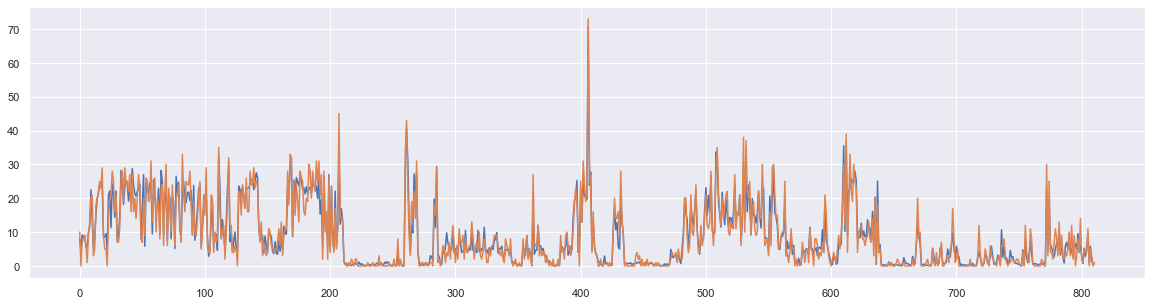

In [11]:
res = sm.OLS(Y,Xr).fit()
y_pred = res.predict(Xr)
pd.Series(y_pred).plot(figsize=(20,5))
Y.plot(figsize=(20,5))

## 1.3. 다양한 군집분석 알고리즘을 적용하여 회귀생성

In [12]:
n_col=50
X = sales.drop(['Product_Code','W51','Normalized 51'],axis=1)
X = X.loc[:, 'W0':'W50']

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)
    
Y=sales['W51']
X=X.fillna(value=0)  #nasty NaN
#scaler = MinMaxScaler()
#scaler.fit(X)
#X=scaler.transform(X)
#poly = PolynomialFeatures(2)
#X=poly.fit_transform(X)

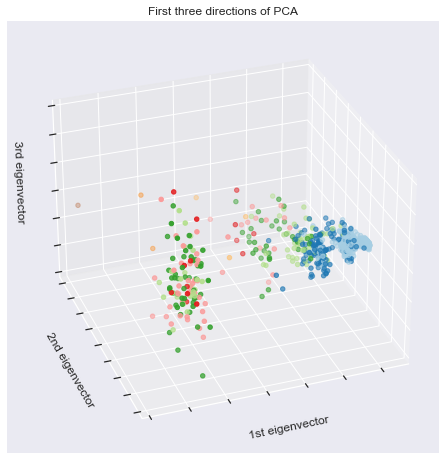

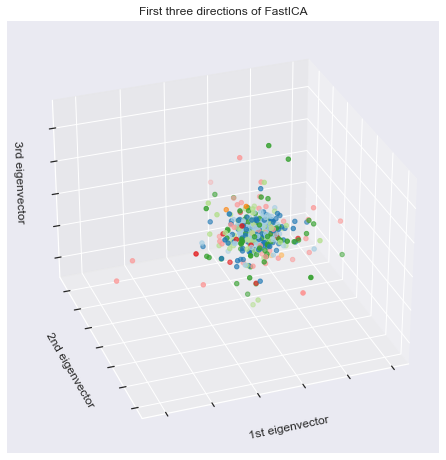

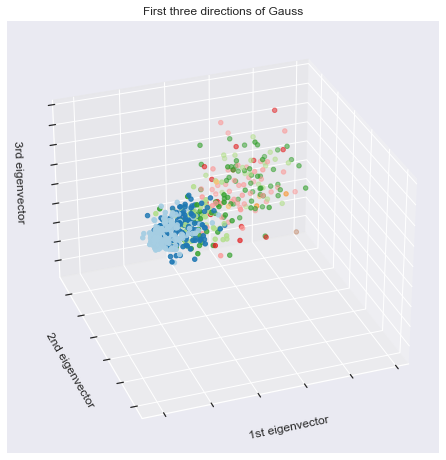

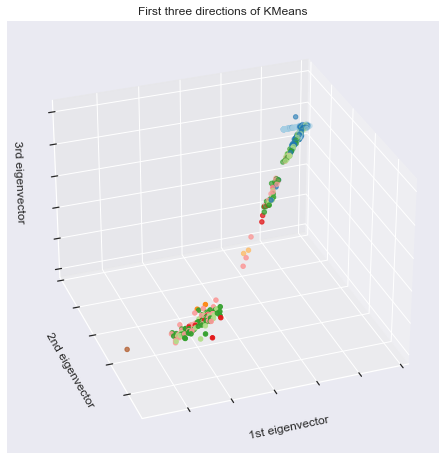

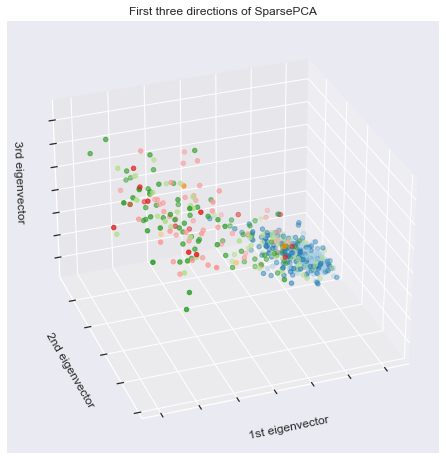

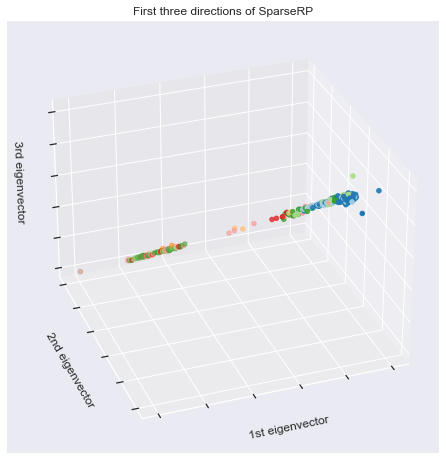

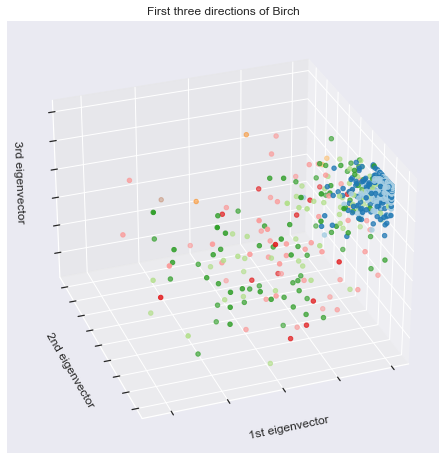

In [13]:
names = [
         'PCA',
         'FastICA',
         'Gauss',
         'KMeans',
         'SparsePCA',
         'SparseRP',
         'Birch',
         'NMF',    
       #  'LatentDietrich',    
        ]

classifiers = [
    
    PCA(n_components=n_col),
    FastICA(n_components=n_col),
    GaussianRandomProjection(n_components=3),
    KMeans(n_clusters=n_col),
    #SparsePCA(n_components=n_col),
    SparseRandomProjection(n_components=n_col, dense_output=True),
    Birch(branching_factor=10, n_clusters=7, threshold=0.5),
    NMF(n_components=n_col),    
    #LatentDirichletAllocation(n_topics=n_col),
    
]
correction= [1,1,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf, correct in temp:
    Xr=clf.fit_transform(X,Y)
    dddraw(Xr, name)
    res = sm.OLS(Y,Xr).fit()
    #print(res.summary())  # show OLS regression
    #print(res.predict(Xr).round()+correct)  #show OLS prediction
    #print('Ypredict',res.predict(Xr).round()+correct)  #show OLS prediction
    
    #print('Ypredict',res.predict(Xr).round()+correct*Y.mean())  #show OLS prediction
    #print(name,'%error',procenterror(res.predict(Xr)+correct*Y.mean(),Y),'rmsle',rmsle(res.predict(Xr)+correct*Y.mean(),Y)) #
    
    
    
    

# <font color='blue'> 2. 시간 군집분석 (Clustering the weeks)

## 2.1  50주(행), 811개 상품(열)로 상품을 특성으로 시계열을 기준으로 데이터 구성

In [14]:
kolom=sales.Product_Code
X = (sales.drop(['Product_Code'],axis=1).T)[:51] #sales 51weeks 
X.columns=kolom
kolom
X.head()
X.shape

0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: Product_Code, Length: 811, dtype: object

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
W0,11.0,7.0,7.0,12.0,8.0,3.0,4.0,8.0,14.0,22.0,...,0.0,5.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0
W1,12.0,6.0,11.0,8.0,5.0,3.0,8.0,6.0,9.0,19.0,...,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
W2,10.0,3.0,8.0,13.0,13.0,2.0,3.0,10.0,10.0,19.0,...,1.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
W3,8.0,2.0,9.0,5.0,11.0,7.0,7.0,9.0,7.0,29.0,...,0.0,5.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0
W4,13.0,7.0,10.0,9.0,6.0,6.0,8.0,6.0,11.0,20.0,...,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0


(51, 811)

## 2.2  52주(819개 상품)의 판매량으로 P33 상품의 53주차 판매량을 예측

In [15]:
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

    
Y=X['P33']
X=X.fillna(value=0)  #nasty NaN

In [16]:
Y.head()

W0    15.0
W1    12.0
W2    11.0
W3    17.0
W4    10.0
Name: P33, dtype: float64

In [17]:
n_col=4
clf = KMeans(n_clusters=n_col)
Xg=clf.fit_predict(X) # Xr=clf.fit_transform(X,Y)

X['cluster_class'] = Xg
X.head()

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P811,P812,P813,P814,P815,P816,P817,P818,P819,cluster_class
W0,11.0,7.0,7.0,12.0,8.0,3.0,4.0,8.0,14.0,22.0,...,5.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1
W1,12.0,6.0,11.0,8.0,5.0,3.0,8.0,6.0,9.0,19.0,...,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1
W2,10.0,3.0,8.0,13.0,13.0,2.0,3.0,10.0,10.0,19.0,...,3.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1
W3,8.0,2.0,9.0,5.0,11.0,7.0,7.0,9.0,7.0,29.0,...,5.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,3
W4,13.0,7.0,10.0,9.0,6.0,6.0,8.0,6.0,11.0,20.0,...,4.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1


### 2.3  시계열자료(52개 인스턴스)를 4개 군집간 거리를 입력변수로 학습한 예측과 실제를 그래프로 비교

In [18]:
Xr=clf.fit_transform(X) # Xr=clf.fit_transform(X,Y)
Xr.shape

(51, 4)

<AxesSubplot:>

<AxesSubplot:>

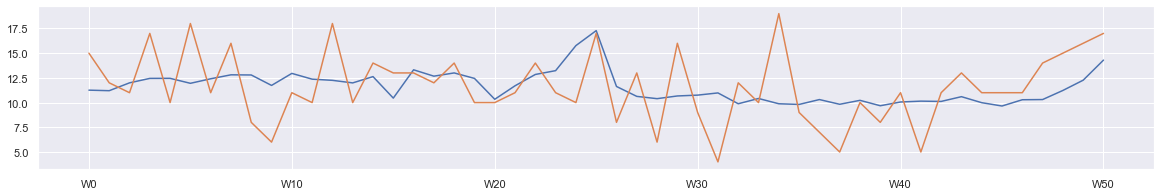

In [19]:
res = sm.OLS(Y,Xr).fit()
y_pred = res.predict(Xr)
pd.Series(y_pred).plot(figsize=(20,3))
Y.plot(figsize=(20,3))

## 2.4 다양한 군집분석 알고리즘을 적용하여 회귀생성

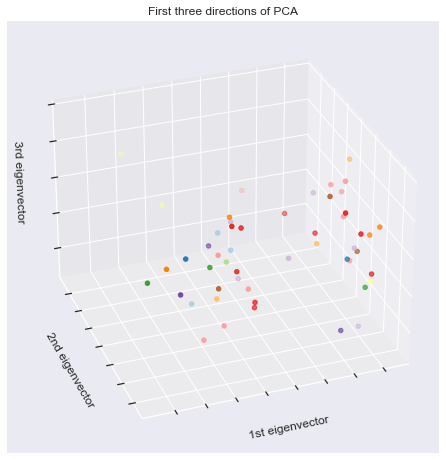

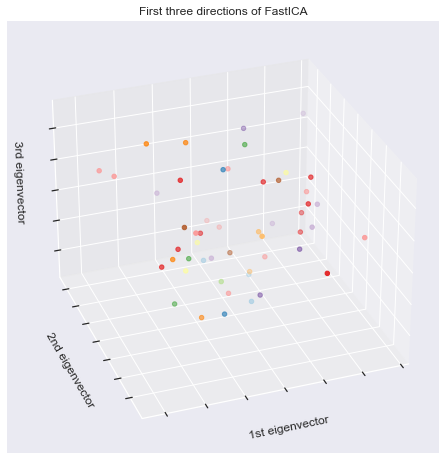

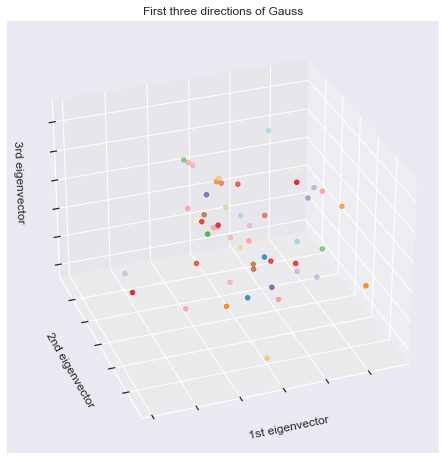

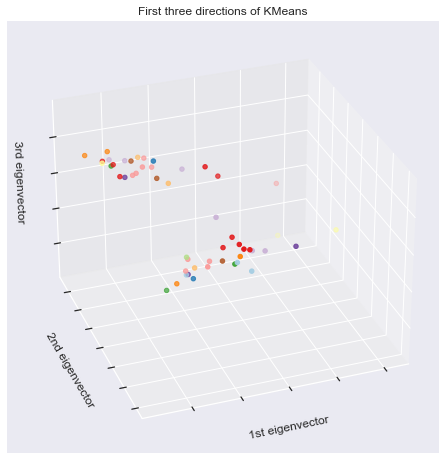

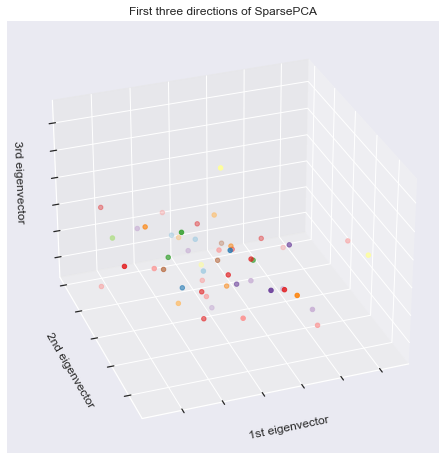

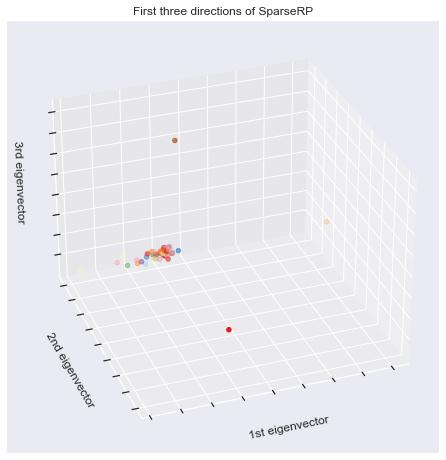

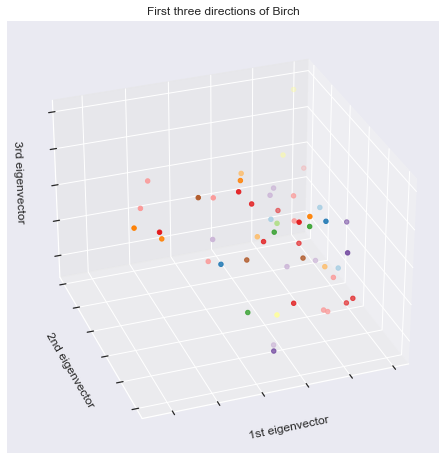

In [20]:
n_col=4
kolom=sales.Product_Code
X = (sales.drop(['Product_Code'],axis=1).T)[:51] #sales 51weeks 
X.columns=kolom

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

    
Y=X['P33']
X=X.fillna(value=0)  #nasty NaN

names = [
         'PCA',
         'FastICA',
         'Gauss',
         'KMeans',
         'SparsePCA',
         'SparseRP',
         'Birch',
         'NMF',    
       #  'LatentDietrich',    
        ]

classifiers = [
    
    PCA(n_components=n_col),
    FastICA(n_components=n_col),
    GaussianRandomProjection(n_components=3),
    KMeans(n_clusters=n_col),
    #SparsePCA(n_components=n_col),
    SparseRandomProjection(n_components=n_col, dense_output=True),
    Birch(branching_factor=10, n_clusters=3, threshold=0.5),
    NMF(n_components=n_col),    
  #  LatentDirichletAllocation(n_topics=n_col),
    
]
correction= [1,1,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf,correct in temp:
    Xr=clf.fit_transform(X,Y)
    dddraw(Xr,name)
    res = sm.OLS(Y,Xr).fit()
    #print(res.summary())  # show OLS regression
    #print(res.predict(Xr).round()+correct)  #show OLS prediction
    #print('Ypredict',res.predict(Xr).round()+correct)  #show OLS prediction
    
    #print('Ypredict',res.predict(Xr).round()+correct*Y.mean())  #show OLS prediction
    #print(name,'%error',procenterror(res.predict(Xr)+correct*Y.mean(),Y),'rmsle',rmsle(res.predict(Xr)+correct*Y.mean(),Y)) #
    
    
    

# <font color='blue'> 3. Target을 예측(regression + classification)

In [49]:
# import some data to play with
#X = df_new[df_new['split']==0]
X = X.drop(['P33'],axis=1)
X.head()

Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
W0,11.0,7.0,7.0,12.0,8.0,3.0,4.0,8.0,14.0,22.0,...,0.0,5.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0
W1,12.0,6.0,11.0,8.0,5.0,3.0,8.0,6.0,9.0,19.0,...,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
W2,10.0,3.0,8.0,13.0,13.0,2.0,3.0,10.0,10.0,19.0,...,1.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
W3,8.0,2.0,9.0,5.0,11.0,7.0,7.0,9.0,7.0,29.0,...,0.0,5.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0
W4,13.0,7.0,10.0,9.0,6.0,6.0,8.0,6.0,11.0,20.0,...,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
Y.value_counts()

11.0    10
10.0     8
14.0     4
13.0     4
12.0     3
17.0     3
16.0     3
8.0      3
15.0     2
5.0      2
18.0     2
6.0      2
9.0      2
4.0      1
7.0      1
19.0     1
Name: P33, dtype: int64

## 3.1 Randomforest로 회귀생성과 분류 결과는 동일함

In [54]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfc = RandomForestClassifier(n_estimators = 200)
regr = rfc.fit(X,Y)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y, regr.predict(X)) 
print(classification_report(Y, regr.predict(X)))

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         8
        11.0       1.00      1.00      1.00        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         4
        14.0       1.00      1.00      1.00         4
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         3
        18.0       1.00      1.00      1.00         2
        19.0       1.00      1.00      1.00         1

    accuracy                           1.00        51
   macro avg       1.00   

In [55]:
rfr = RandomForestRegressor()
clf = rfr.fit(X,Y)
confusion_matrix(Y, regr.predict(X)) 
print(classification_report(Y, regr.predict(X)))

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         8
        11.0       1.00      1.00      1.00        10
        12.0       1.00      1.00      1.00         3
        13.0       1.00      1.00      1.00         4
        14.0       1.00      1.00      1.00         4
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         3
        17.0       1.00      1.00      1.00         3
        18.0       1.00      1.00      1.00         2
        19.0       1.00      1.00      1.00         1

    accuracy                           1.00        51
   macro avg       1.00   

## 3.2 다양한 알고리즘으로 예측 결과 확인

In [46]:
from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor
from sklearn.linear_model import Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

#Y=df_new[df_new['split']==0]


#X=X.replace([np.inf, -np.inf], np.nan).fillna(value=0)
#print(X) #nasty NaN
#scaler = MinMaxScaler()
#scaler.fit(X)
#X=scaler.transform(X)
#poly = PolynomialFeatures(2)
#X=poly.fit_transform(X)


names = [
         #'ElasticNet',
         'SVC',
         'kSVC',
         'KNN',
         'DecisionTree',
         'RandomForestClassifier',
         #'GridSearchCV',
         'HuberRegressor',
         'Ridge',
         'Lasso',
         'LassoCV',
         'Lars',
         #'BayesianRidge',
         'SGDClassifier',
         'RidgeClassifier',
         'LogisticRegression',
         'OrthogonalMatchingPursuit',
         #'RANSACRegressor',
         ]

classifiers = [
    #ElasticNetCV(cv=10, random_state=0),
    SVC(),
    SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 200),
    #GridSearchCV(SVC(),param_grid, refit = True, verbose = 1),
    HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,epsilon=2.95),
    Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True),
    Lasso(alpha=0.05),
    LassoCV(),
    Lars(n_nonzero_coefs=10),
    #BayesianRidge(),
    SGDClassifier(),
    RidgeClassifier(),
    LogisticRegression(),
    OrthogonalMatchingPursuit(),
    #RANSACRegressor(),
]
correction= [0,0,0,0,0,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf,correct in temp:
    regr=clf.fit(X,Y)
    #print( name,'% errors', abs(regr.predict(X)+correct-Y).sum()/(Y.sum())*100)
    print(name,'%error',procenterror(regr.predict(X),Y),'rmsle',rmsle(regr.predict(X),Y))
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

    # Confusion Matrix
    print(name,'Confusion Matrix')
    print(confusion_matrix(Y, np.round(regr.predict(X) ) ) )
    print('--'*40)

    # Classification Report
    print('Classification Report')
    print(classification_report(Y,np.round( regr.predict(X) ) ))

    # Accuracy
    print('--'*40)
    logreg_accuracy = round(accuracy_score(Y, np.round( regr.predict(X) ) ) * 100,2)
    print('Accuracy', logreg_accuracy,'%')

SVC %error 23.6 rmsle 0.3089363991208324
SVC Confusion Matrix
[[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
--------------------------------------------------------------------------------
Classification Report
              prec

Accuracy 100.0 %
RandomForestClassifier %error 0.0 rmsle 0.0
RandomForestClassifier Confusion Matrix
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
--------------------------------------------------------------------------------
C

LassoCV %error 24.3 rmsle 0.31200318409166783
LassoCV Confusion Matrix
[[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]
--------------------------------------------------------------------------------
Classification Report
         

# End